## Good theory related articles 

[SVM and Kernel SVM](https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200)

[Visualising how different kernels in SVMs work](https://www.kaggle.com/joparga3/3-visualising-how-different-kernels-in-svms-work)

### SVM or Support Vector Machine is a linear model for classification and regression problems.

# Gamma:

It defines how far the influence of a single training example reaches. If it has a low value it means that every point has a far reach and conversely high value of gamma means that every point has close reach.

If gamma has a very high value, then the decision boundary is just going to be dependent upon the points that are very close to the line which effectively results in ignoring some of the points that are very far from the decision boundary. This is because the closer points get more weight and it results in a wiggly curve as shown in previous graph.On the other hand, if the gamma value is low even the far away points get considerable weight and we get a more linear curve.

In [63]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc, plot_lift_curve

# Data Preparation

In [21]:
def getting_data_ready():
    
    """This fuction load all the data and split it.
    To make life simple of loading and checking performance.
    """
    
    # for loading all the data
    df = pd.read_csv('./data/scaled_datatrainingcopy.csv')
    df_test1 = pd.read_csv('./data/scaled_datatestcopy.csv')
    df_test2 = pd.read_csv('./data/scaled_datatest2copy.csv')

    class_name = "Occupancy"

    attributes = [col for col in df.columns if col != class_name]
    X = df[attributes].values # this is used so that you can get np value
    y = df[class_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

    attributes = [col for col in df.columns if col != class_name]
    X_test1 = df_test1[attributes].values
    y_test1 = df_test1[class_name]


    attributes = [col for col in df.columns if col != class_name]
    X_test2 = df_test2[attributes].values
    y_test2 = df_test2[class_name]
    
    
    return X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2


In [71]:
X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2 = getting_data_ready()

# this is list to be used in testing automation

tests = [(X_test,y_test,"Training"),(X_test1,y_test1,"TestSet 1"),
         (X_test2,y_test2,"TestSet 2")]

In [72]:
tests[0]

(array([[ 1.45637069,  2.18518782,  1.57376283,  3.80272912,  2.78836199,
          1.        ],
        [-1.20871201,  0.92363253, -0.61372607, -0.52512063,  0.50438216,
          0.        ],
        [-1.36606007,  0.86818617, -0.49048726, -0.55534638,  0.40419079,
          0.        ],
        ...,
        [-0.11710987,  1.40456941, -0.61372607,  0.10325674,  1.33496465,
          1.        ],
        [ 0.57128788, -0.351031  ,  1.53781817,  0.10802923, -0.19119525,
          1.        ],
        [ 0.61554202, -0.09609829, -0.61372607, -0.45035168,  0.08049748,
          1.        ]]),
 7211    1
 4849    0
 5356    0
 6710    1
 3873    0
        ..
 5318    0
 5693    0
 7444    0
 868     1
 373     0
 Name: Occupancy, Length: 2443, dtype: int64,
 'Training')

## Function to show reports

In [86]:
def show_report(tests= tests,clf= clf):
    
    """This fuction itrate over all the avalable 
    data and get the result.
    """
    
    for test, results, name in tests:

        y_pred = clf.predict(test)
        print('\n ===============Results for {}================== \n'.format(name))
        print('Accuracy %s' % accuracy_score(results, y_pred))
        print('F1-score %s' % f1_score(results, y_pred, average=None))
        print(classification_report(results, y_pred))
        y_score = clf.predict_proba(test)
        plt.title(name)
        plot_roc(results, y_score)
        plot_lift_curve(results, y_score)
        plt.show()
        plt.savefig('/Users/piyush2017/Downloads/svm_charts/{}.png'.format(name))

In [88]:
def show_report_side(tests= tests,clf= clf):
    
    """This fuction itrate over all the avalable 
    data and get the result.
    """
    
#     for test, results, name in tests[0]:
    test, results, name = (X_test,y_test,"Training")
    
    y_pred = clf.predict(test)
    print('\n ===============Results for {}================== \n'.format(name))
    print('Accuracy %s' % accuracy_score(results, y_pred))
    print('F1-score %s' % f1_score(results, y_pred, average=None))
    print(classification_report(results, y_pred))
    y_score = clf.predict_proba(test)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Horizontally stacked subplots')
    (plot_roc(results, y_score)).plot()
    (plot_lift_curve(results, y_score)).plot()


    plt.show()
    return ax1, ax2

In [23]:
def show_report_without_chart(tests= tests,clf= clf):
    
    """This fuction itrate over all the avalable 
    data and get the result.
    """
    
    for test, results, name in tests:

        y_pred = clf.predict(test)
        print('\n ===============Results for {}================== \n'.format(name))
        print('Accuracy %s' % accuracy_score(results, y_pred))
        print('F1-score %s' % f1_score(results, y_pred, average=None))
        print(classification_report(results, y_pred))
#         y_score = clf.predict_proba(test)
#         plot_roc(results, y_score)
#         plot_lift_curve(results, y_score)
#         plt.show()

In [90]:
def show_result_table(tests= tests,clf= clf,axis = 1):
    
    df_report = pd.DataFrame()

    for test, results, name in tests:
    
        y_pred = clf.predict(test)
        results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
#       print(results.T)
        df_report = pd.concat([df_report, results.T], axis=axis )

    # this code will delete unwanted things

    df_report.drop(['support'], axis=1, inplace=True)
    df_report.drop(['macro avg','weighted avg'], axis=0,inplace=True)
    print(df_report.round(decimals=2))
    
    return df_report

#     df_report.to_excel('/Users/piyush2017/Downloads/07_ensemble.xlsx')
#     df_report.head(5)

# Linear SVM

In [14]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV # we are using to find the best value of C

In [12]:
# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10]}

In [15]:
clf = LinearSVC(predi)
searcher = GridSearchCV(clf, param_grid = parameters)
searcher.fit(X_train, y_train)

/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblin

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10}
Best CV accuracy 0.9880701754385965
Test accuracy of best grid search hypers: 0.9905853458862055


As we can see from the above exprements that the best value of of c is 10. Now we will use this value to get the results for 2 testsets that we have.

In [91]:
tabl = show_result_table(clf=searcher)

          precision  recall  f1-score  precision  recall  f1-score  precision  \
0              1.00    0.99      0.99       0.95    0.98      0.97       0.98   
1              0.96    1.00      0.98       0.97    0.91      0.94       0.98   
accuracy       0.99    0.99      0.99       0.96    0.96      0.96       0.98   

          recall  f1-score  
0           0.99      0.99  
1           0.93      0.95  
accuracy    0.98      0.98  


In [92]:
tabl.to_excel('/Users/piyush2017/Downloads/linearsvm.xlsx')

## Effect of C

### Example given by profesor that is not needed for report

/Users/piyush2017/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


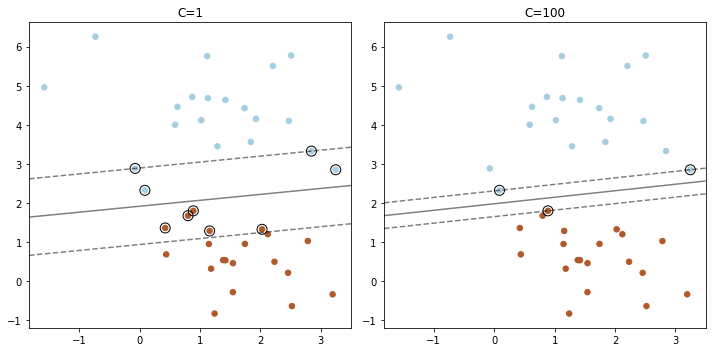

In [16]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

# Nonlinear SVM

Below we are doing nonlinear SVM for the whole dataset

In [42]:
from sklearn.svm import SVC

In [48]:
from sklearn.model_selection import ParameterGrid

In [53]:
svm = SVC(gamma='auto', random_state= 45, probability=True,C=0.1)

In [55]:
for kernel in ['linear', 'rbf', 'poly']:
    svm = SVC(gamma='auto', random_state= 45, probability=True,C=0.1, kernel=kernel)
    svm.fit(X_train, y_train)
    show_result_table(clf=svm)

          precision  recall  f1-score  support
0              1.00    0.99      0.99  1924.00
1              0.96    1.00      0.98   519.00
accuracy       0.99    0.99      0.99     0.99
0              1.00    0.97      0.98  1693.00
1              0.95    1.00      0.97   972.00
accuracy       0.98    0.98      0.98     0.98
0              1.00    0.99      1.00  7703.00
1              0.97    1.00      0.98  2049.00
accuracy       0.99    0.99      0.99     0.99
          precision  recall  f1-score  support
0              1.00    0.99      0.99  1924.00
1              0.96    1.00      0.98   519.00
accuracy       0.99    0.99      0.99     0.99
0              1.00    0.97      0.98  1693.00
1              0.95    1.00      0.97   972.00
accuracy       0.98    0.98      0.98     0.98
0              1.00    0.99      1.00  7703.00
1              0.98    0.99      0.98  2049.00
accuracy       0.99    0.99      0.99     0.99
          precision  recall  f1-score  support
0            


 ===============Results for Training================== 

Accuracy 0.9901760130986492
F1-score [0.99373041 0.97731569]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



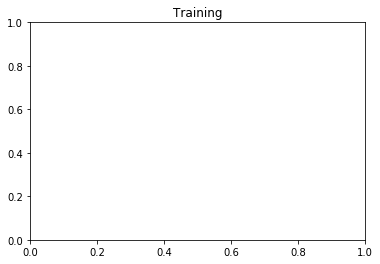

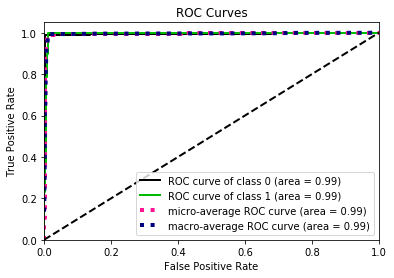

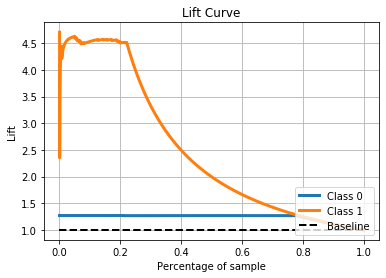


 ===============Results for TestSet 1================== 

Accuracy 0.8776735459662289
F1-score [0.91165312 0.80121951]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1693
           1       0.98      0.68      0.80       972

    accuracy                           0.88      2665
   macro avg       0.91      0.83      0.86      2665
weighted avg       0.89      0.88      0.87      2665



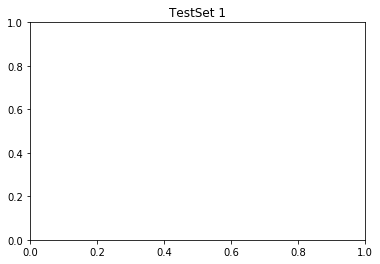

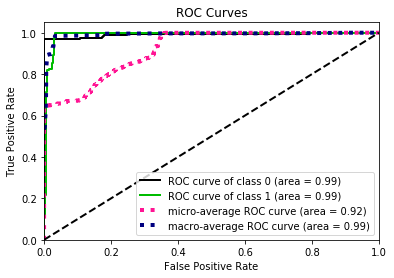

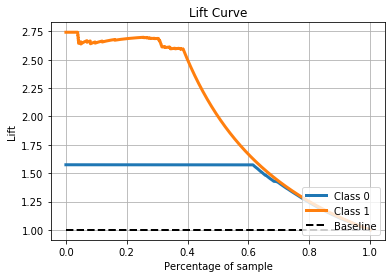


 ===============Results for TestSet 2================== 

Accuracy 0.9774405250205086
F1-score [0.98552632 0.94888476]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      7703
           1       0.91      1.00      0.95      2049

    accuracy                           0.98      9752
   macro avg       0.95      0.98      0.97      9752
weighted avg       0.98      0.98      0.98      9752



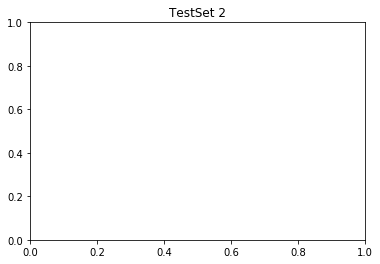

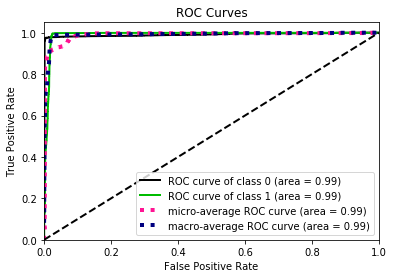

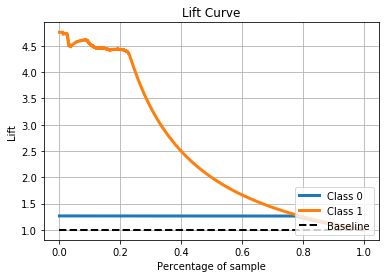

<Figure size 432x288 with 0 Axes>

In [87]:
show_report(clf=svm)

In [105]:
tfff = pd.DataFrame()
for kernel in ['linear', 'rbf', 'poly']:
    svm = SVC(gamma='auto', random_state= 45, probability=True,C=0.1, kernel=kernel)
    svm.fit(X_train, y_train)
    
    now_re = show_result_table(clf=svm)
    tfff = pd.concat([tfff,now_re ], axis=0 )
    #tfff.concat(show_result_table(clf=svm))
    

          precision  recall  f1-score  precision  recall  f1-score  precision  \
0              1.00    0.99      0.99       1.00    0.97      0.98       1.00   
1              0.96    1.00      0.98       0.95    1.00      0.97       0.97   
accuracy       0.99    0.99      0.99       0.98    0.98      0.98       0.99   

          recall  f1-score  
0           0.99      1.00  
1           1.00      0.98  
accuracy    0.99      0.99  
          precision  recall  f1-score  precision  recall  f1-score  precision  \
0              1.00    0.99      0.99       1.00    0.97      0.98       1.00   
1              0.96    1.00      0.98       0.95    1.00      0.97       0.98   
accuracy       0.99    0.99      0.99       0.98    0.98      0.98       0.99   

          recall  f1-score  
0           0.99      1.00  
1           0.99      0.98  
accuracy    0.99      0.99  
          precision  recall  f1-score  precision  recall  f1-score  precision  \
0              1.00    0.99      0.99

In [106]:
tfff

,precision,recall,f1-score,precision,recall,f1-score,precision,recall,f1-score
0,0.999474,0.988046,0.993727,0.998781,0.968104,0.983203,0.999215,0.991692,0.995439
1,0.957486,0.998073,0.977358,0.947266,0.997942,0.971944,0.969625,0.997072,0.983157
accuracy,0.990176,0.990176,0.990176,0.978987,0.978987,0.978987,0.992822,0.992822,0.992822
0,1.000000,0.988046,0.993987,0.997564,0.967513,0.982309,0.997785,0.994158,0.995968
1,0.957565,1.000000,0.978322,0.946237,0.995885,0.970426,0.978334,0.991703,0.984973
accuracy,0.990585,0.990585,0.990585,0.977861,0.977861,0.977861,0.993642,0.993642,0.993642
0,0.998950,0.988565,0.993730,0.842263,0.993503,0.911653,0.999066,0.972348,0.985526
1,0.959184,0.996146,0.977316,0.983533,0.675926,0.801220,0.905543,0.996584,0.948885
accuracy,0.990176,0.990176,0.990176,0.877674,0.877674,0.877674,0.977441,0.977441,0.977441


In [107]:
tfff.to_excel('/Users/piyush2017/Downloads/nonlinearsvm.xlsx')

In [78]:
ax1
plt.show()

As you can it is performing very well, the interesting thing to note here is that 0 has four times the values of 1 even then model is good at predicting those values

In this experiment we are adding two more parameters ( C=0.1, kernel='rbf') to see what is the effect of results

## Effect of Different Kernels

Below is an example provided by professor 

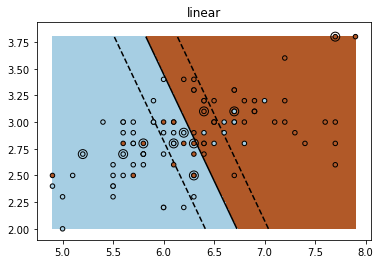

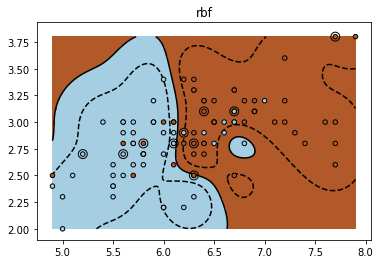

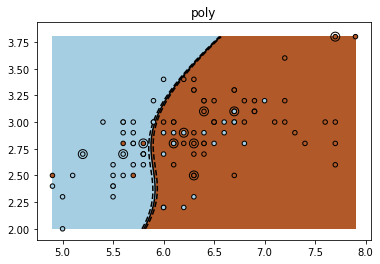

In [23]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

In [14]:
class_name = "Occupancy"
df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/jupyter_notebooks/data/scaled_datatrainingcopy.csv')
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Week_day,Occupancy
0,2.518470,0.278526,1.573763,0.364948,1.091757,1,1
1,2.488967,0.277713,1.591735,0.341881,1.080555,1,1
2,2.488967,0.273645,1.573763,0.340290,1.075889,1,1
3,2.488967,0.265508,1.573763,0.323587,1.066555,1,1
4,2.439796,0.265508,1.573763,0.311655,1.049523,1,1


In [43]:
attributes = ['Temperature','CO2'] #[col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

For this code to work we have reduce the number of columns so in this case I have seleceted 

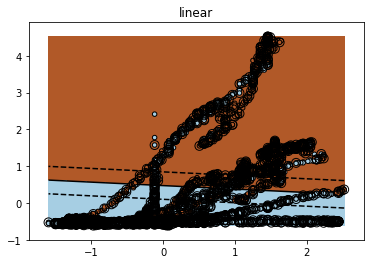

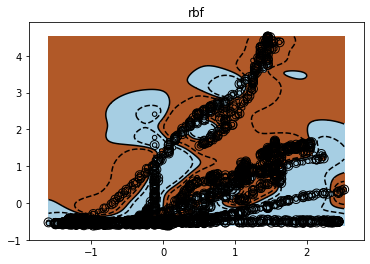

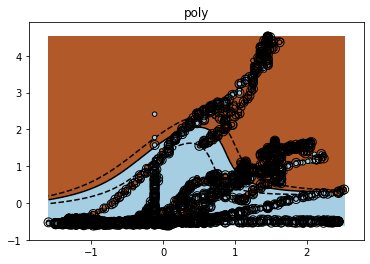

In [44]:
# from sklearn.datasets import load_iris

# iris = load_iris()
# X = iris.data
# y = iris.target

# X = X[y != 0, :2]
# y = y[y != 0]

# n_sample = len(X)

# np.random.seed(0)
# order = np.random.permutation(n_sample)
# X = X[order]
# y = y[order].astype(np.float)

# X_train = X[:int(.9 * n_sample)]
# y_train = y[:int(.9 * n_sample)]
# X_test = X[int(.9 * n_sample):]
# y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

As we can see from above charts that we cannot make any interpretion from the above charts so its better if we use a small set of data.

# Using small set of data to get better visuals

In [32]:
attributes = ['Temperature','CO2'] #[col for col in df.columns if col != class_name]
X = df[attributes][:100].values
y = df[class_name][:100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

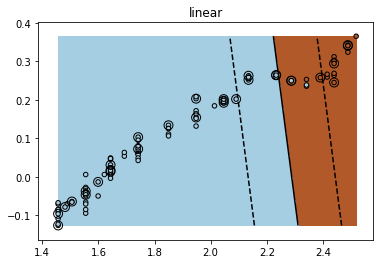

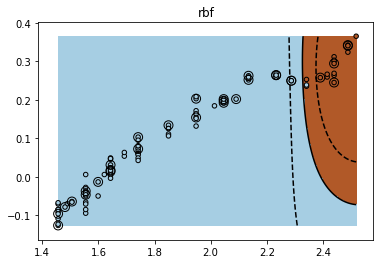

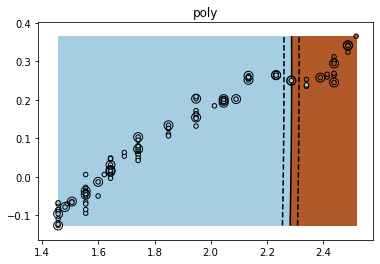

In [33]:
# from sklearn.datasets import load_iris

# iris = load_iris()
# X = iris.data
# y = iris.target

# X = X[y != 0, :2]
# y = y[y != 0]

# n_sample = len(X)

# np.random.seed(0)
# order = np.random.permutation(n_sample)
# X = X[order]
# y = y[order].astype(np.float)

# X_train = X[:int(.9 * n_sample)]
# y_train = y[:int(.9 * n_sample)]
# X_test = X[int(.9 * n_sample):]
# y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()